# Exploratory Data Analysis (EDA) Notebook 

# 1.0 Importing Required Packages

In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
from sklearn.impute import KNNImputer

# 2.0 Reading and Exploring Data

In [2]:
df = pd.read_csv("METABRIC_RNA_Mutation.csv")
df.head()

C:\Users\as\AppData\Local\Temp\ipykernel_19452\1117333770.py:1: DtypeWarning: Columns (678,688,690,692) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("METABRIC_RNA_Mutation.csv")


,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0


Our dataset has 693 columns with the following groups:
- The first 31 columns refer to clinical attributes.
- 331 columns refer to m-RNA level z-score.
- 331 columns refer to mutation in 175 genes.

This is a brief explanation of each clinical attribute:
| Name                           | Type   | Description |
| --                             | --     | -- |
| patient_id                      | object | Patient ID |
| age_at_diagnosis               | float  | 	Age of the patient at diagnosis time |
| type_of_breast_surgery         | object | 	Breast cancer surgery type: 1- **MASTECTOMY**, which refers to a surgery to remove all breast tissue from a breast as a way to treat or prevent breast cancer. 2- **BREAST CONSERVING**, which refers to a urgery where only the part of the breast that has cancer is removed |
| cancer_type                    | object | Breast cancer types: 1- **Breast Cancer** or 2- **Breast Sarcoma** |
| cancer_type_detailed           | object | 	Detailed Breast cancer types: 1- **Breast Invasive Ductal Carcinoma** 2- **Breast Mixed Ductal and Lobular Carcinoma** 3- **Breast Invasive Lobular Carcinoma** 4- **Breast Invasive Mixed Mucinous Carcinoma** 5- **Metaplastic Breast Cancer** |
| cellularity                    | object | Cancer cellularity post chemotherapy, which refers to the amount of tumor cells in the specimen and their arrangement into clusters |
| chemotherpay                   | int    | 	Whether or not the patient had chemotherapy as a treatment (yes/no) |
| pam50_+_claudin-low_subtype    | object | Pam 50: is a tumor profiling test that helps show whether some estrogen receptor-positive (ER-positive), HER2-negative breast cancers are likely to metastasize (when breast cancer spreads to other organs). The claudin-low breast cancer subtype is defined by gene expression characteristics, most prominently: Low expression of cell–cell adhesion genes, high expression of epithelial–mesenchymal transition (EMT) genes, and stem cell-like/less differentiated gene expression patterns |
| cohort                         | float  | Cohort is a group of subjects who share a defining characteristic (It takes a value from 1 to 5) |
| er_status_measured_by_ihc      | float  | To assess if estrogen receptors are expressed on cancer cells by using immune-histochemistry (a dye used in pathology that targets specific antigen, if it is there, it will give a color, it is not there, the tissue on the slide will be colored) (positive/negative) |
| er_status                      | object | 	Cancer cells are positive or negative for estrogen receptors |
| neoplasm_histologic_grade      | int    | 	Determined by pathology by looking the nature of the cells, do they look aggressive or not (It takes a value from 1 to 3) |
| her2_status_measured_by_snp6   | object | t	To assess if the cancer positive for HER2 or not by using advance molecular techniques (Type of next generation sequencing) |
| her2_status                    | object | Whether the cancer is positive or negative for HER2 |
| tumor_other_histologic_subtype | object | Type of the cancer based on microscopic examination of the cancer tissue (It takes a value of 'Ductal/NST', 'Mixed', 'Lobular', 'Tubular/ cribriform', 'Mucinous', 'Medullary', 'Other', 'Metaplastic' ) |
| hormone_therapy                | int    | Whether or not the patient had hormonal as a treatment (yes/no) |
| inferred_menopausal_state      | object | Whether the patient is is post menopausal or not (post/pre) |
| integrative_cluster            | object | Molecular subtype of the cancer based on some gene expression (It takes a value from '4ER+', '3', '9', '7', '4ER-', '5', '8', '10', '1', '2', '6') | 
| primary_tumor_laterality       | object | 	Whether it is involving the right breast or the left breast |
| lymph_nodes_examined_positive  | float  | 	To take samples of the lymph node during the surgery and see if there were involved by the cancer |
| mutation_count                 | float  | Number of gene that has relevant mutations |
| nottingham_prognostic_index    | float  | It is used to determine prognosis following surgery for breast cancer. Its value is calculated using three pathological criteria: the size of the tumour; the number of involved lymph nodes; and the grade of the tumour. | 
| oncotree_code                  | object | 	The OncoTree is an open-source ontology that was developed at Memorial Sloan Kettering Cancer Center (MSK) for standardizing cancer type diagnosis from a clinical perspective by assigning each diagnosis a unique OncoTree code. | 
| overall_survival_months        | float  | Duration from the time of the intervention to death |
| overall_survival               | object | Target variable wether the patient is alive of dead. |
| pr_status                      | object | 	Cancer cells are positive or negative for progesterone receptors | 
| radio_therapy                  | int    | 	Whether or not the patient had radio as a treatment (yes/no) |
| 3-gene_classifier_subtype	     | object | Three Gene classifier subtype It takes a value from 'ER-/HER2-', 'ER+/HER2- High Prolif', nan, 'ER+/HER2- Low Prolif','HER2+' |
| tumor_size                     | float  | 	Tumor size measured by imaging techniques |
| tumor_stage                    | float  | Stage of the cancer based on the involvement of surrounding structures, lymph nodes and distant spread |
| death_from_cancer              | int    | Whether the patient's death was due to cancer or not (yes/no) |

In [3]:
df.iloc[:, :31].isnull().sum()

patient_id                          0
age_at_diagnosis                    0
type_of_breast_surgery             22
cancer_type                         0
cancer_type_detailed               15
cellularity                        54
chemotherapy                        0
pam50_+_claudin-low_subtype         0
cohort                              0
er_status_measured_by_ihc          30
er_status                           0
neoplasm_histologic_grade          72
her2_status_measured_by_snp6        0
her2_status                         0
tumor_other_histologic_subtype     15
hormone_therapy                     0
inferred_menopausal_state           0
integrative_cluster                 0
primary_tumor_laterality          106
lymph_nodes_examined_positive       0
mutation_count                     45
nottingham_prognostic_index         0
oncotree_code                      15
overall_survival_months             0
overall_survival                    0
pr_status                           0
radio_therap

In [4]:
categorical_cols = [
    "type_of_breast_surgery",
    "cancer_type_detailed",
    "cellularity",
    "er_status_measured_by_ihc",
    "tumor_other_histologic_subtype",
    "oncotree_code",
    "primary_tumor_laterality",
    "3-gene_classifier_subtype",
]

# Impute categorical variables with mode
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

numeric_cols = [
    "neoplasm_histologic_grade",
    "lymph_nodes_examined_positive",
    "mutation_count",
    "tumor_size",
    "overall_survival_months",
]

# Impute numeric variables with median
for col in numeric_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Impute tumor stage with KNN
tumor_stage = df[["tumor_stage"]]
imputer = KNNImputer(n_neighbors=3)
tumor_stage_imputed = imputer.fit_transform(tumor_stage)
tumor_stage_imputed = pd.DataFrame(tumor_stage_imputed, columns=["tumor_stage"])
df["tumor_stage"] = tumor_stage_imputed

# Remove the only one NAN sample of death from cancer
df.dropna(subset=["death_from_cancer"], inplace=True)

In [5]:
df.iloc[:, :31].isnull().sum()

patient_id                        0
age_at_diagnosis                  0
type_of_breast_surgery            0
cancer_type                       0
cancer_type_detailed              0
cellularity                       0
chemotherapy                      0
pam50_+_claudin-low_subtype       0
cohort                            0
er_status_measured_by_ihc         0
er_status                         0
neoplasm_histologic_grade         0
her2_status_measured_by_snp6      0
her2_status                       0
tumor_other_histologic_subtype    0
hormone_therapy                   0
inferred_menopausal_state         0
integrative_cluster               0
primary_tumor_laterality          0
lymph_nodes_examined_positive     0
mutation_count                    0
nottingham_prognostic_index       0
oncotree_code                     0
overall_survival_months           0
overall_survival                  0
pr_status                         0
radio_therapy                     0
3-gene_classifier_subtype   

## 2.1 Splitting each Group of Features to a Seperate DataFrame

In [7]:
clinical_data = df.iloc[:, :31]
clinical_data.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage,death_from_cancer
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,claudin-low,1.0,Positve,...,6.044,IDC,140.500000,1,Negative,1,ER-/HER2-,22.0,2.0,Living
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,4.020,IDC,84.633333,1,Positive,1,ER+/HER2- High Prolif,10.0,1.0,Living
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,4.030,IDC,163.700000,0,Positive,0,ER+/HER2- Low Prolif,15.0,2.0,Died of Disease
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,4.050,MDLC,164.933333,1,Positive,1,ER+/HER2- Low Prolif,25.0,2.0,Living
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,6.080,MDLC,41.366667,0,Positive,1,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


In [8]:
m_rna_data = df.iloc[:, 31:-173]
m_rna_data.head()

,brca1,brca2,palb2,pten,tp53,atm,cdh1,chek2,nbn,nf1,...,srd5a1,srd5a2,srd5a3,st7,star,tnk2,tulp4,ugt2b15,ugt2b17,ugt2b7
0,-1.3990,-0.5738,-1.6217,1.4524,0.3504,1.1517,0.0348,0.1266,-0.8361,-0.8578,...,-1.1877,-0.0194,-1.6345,-0.2142,-0.5698,-1.1741,-1.4779,-0.5954,-0.8847,-0.3354
1,-1.3800,0.2777,-1.2154,0.5296,-0.0136,-0.2659,1.3594,0.7961,0.5419,-2.6059,...,-0.4412,0.4534,0.4068,0.7634,0.0231,0.9121,-0.9538,-0.2264,0.5398,-0.8920
2,0.0670,-0.8426,0.2114,-0.3326,0.5141,-0.0803,1.1398,0.4187,-0.4030,-1.1305,...,-0.5381,0.0668,0.8344,1.7227,0.4024,-3.7172,-1.5538,1.3701,-0.1078,0.3655
3,0.6744,-0.5428,-1.6592,0.6369,1.6708,-0.8880,1.2491,-1.1889,-0.4174,-0.6165,...,-0.5630,-0.7078,0.8228,0.6819,-0.1948,-2.3286,-0.9924,-0.3154,0.2320,-0.4828
4,1.2932,-0.9039,-0.7219,0.2168,0.3484,0.3897,0.9131,0.9356,0.7675,-0.2940,...,-0.5845,-0.3544,-1.0150,2.2961,0.1817,-0.1572,0.0427,5.0048,3.8476,1.3223


In [9]:
mutation_data = df.iloc[:, -173:]
mutation_data.head()

,pik3ca_mut,tp53_mut,muc16_mut,ahnak2_mut,kmt2c_mut,syne1_mut,gata3_mut,map3k1_mut,ahnak_mut,dnah11_mut,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,H178P,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,H1047R,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,E542K,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,S241F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
clinical_data.dtypes.value_counts()

object     17
float64     9
int64       5
dtype: int64

In [11]:
m_rna_data.dtypes.value_counts()

float64    489
dtype: int64

In [12]:
mutation_data.dtypes.value_counts()

object    173
dtype: int64

## 2.2 Exploratory Data Analysis (EDA)

### 2.2.1 Exploring Clinical Attributes of Type `object`

In [13]:
object_columns_df = clinical_data.select_dtypes(include="object")
object_columns_df.head()

,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,pam50_+_claudin-low_subtype,er_status_measured_by_ihc,er_status,her2_status_measured_by_snp6,her2_status,tumor_other_histologic_subtype,inferred_menopausal_state,integrative_cluster,primary_tumor_laterality,oncotree_code,pr_status,3-gene_classifier_subtype,death_from_cancer
0,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,claudin-low,Positve,Positive,NEUTRAL,Negative,Ductal/NST,Post,4ER+,Right,IDC,Negative,ER-/HER2-,Living
1,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,LumA,Positve,Positive,NEUTRAL,Negative,Ductal/NST,Pre,4ER+,Right,IDC,Positive,ER+/HER2- High Prolif,Living
2,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,LumB,Positve,Positive,NEUTRAL,Negative,Ductal/NST,Pre,3,Right,IDC,Positive,ER+/HER2- Low Prolif,Died of Disease
3,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,LumB,Positve,Positive,NEUTRAL,Negative,Mixed,Pre,9,Right,MDLC,Positive,ER+/HER2- Low Prolif,Living
4,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,LumB,Positve,Positive,NEUTRAL,Negative,Mixed,Post,9,Right,MDLC,Positive,ER+/HER2- High Prolif,Died of Disease


In [14]:
object_columns_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1903 entries, 0 to 1903
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   type_of_breast_surgery          1903 non-null   object
 1   cancer_type                     1903 non-null   object
 2   cancer_type_detailed            1903 non-null   object
 3   cellularity                     1903 non-null   object
 4   pam50_+_claudin-low_subtype     1903 non-null   object
 5   er_status_measured_by_ihc       1903 non-null   object
 6   er_status                       1903 non-null   object
 7   her2_status_measured_by_snp6    1903 non-null   object
 8   her2_status                     1903 non-null   object
 9   tumor_other_histologic_subtype  1903 non-null   object
 10  inferred_menopausal_state       1903 non-null   object
 11  integrative_cluster             1903 non-null   object
 12  primary_tumor_laterality        1903 non-null   

As we can see, we have 17 feature of type `object`. Let's take a closer look at each feature to see their values 

In [15]:
for column in object_columns_df.columns:
    print(object_columns_df[column].value_counts())
    print("=" * 50)

MASTECTOMY           1149
BREAST CONSERVING     754
Name: type_of_breast_surgery, dtype: int64
Breast Cancer     1902
Breast Sarcoma       1
Name: cancer_type, dtype: int64
Breast Invasive Ductal Carcinoma             1514
Breast Mixed Ductal and Lobular Carcinoma     207
Breast Invasive Lobular Carcinoma             142
Breast Invasive Mixed Mucinous Carcinoma       22
Breast                                         17
Metaplastic Breast Cancer                       1
Name: cancer_type_detailed, dtype: int64
High        993
Moderate    711
Low         199
Name: cellularity, dtype: int64
LumA           678
LumB           461
Her2           220
claudin-low    199
Basal          199
Normal         140
NC               6
Name: pam50_+_claudin-low_subtype, dtype: int64
Positve     1474
Negative     429
Name: er_status_measured_by_ihc, dtype: int64
Positive    1458
Negative     445
Name: er_status, dtype: int64
NEUTRAL    1383
GAIN        417
LOSS         99
UNDEF         4
Name: her2_status

In [16]:
def plot_pie_chart(ax, data, title, colormap):
    """
    Plots a pie chart on the given Axes object.

    Parameters:
        - ax (matplotlib.axes.Axes): The axes on which to plot the pie chart.
        - data (pandas.Series): The data to be plotted, with categories and their counts.
        - title (str): The title of the pie chart.
        - colormap (str): The colormap to be used for the pie chart slices.

    Returns:
        - None
    """

    counts = data.value_counts()
    labels = counts.index
    sizes = counts.values

    cmap = cm.get_cmap(colormap)
    colors = cmap(np.linspace(0, 1, len(sizes)))

    ax.pie(
        sizes,
        labels=labels,
        startangle=180,
        colors=colors,
        counterclock=False,
        wedgeprops=dict(width=0.5, edgecolor="w")
    )

    ax.set_title(title, fontsize=18, pad=10)
    ax.axis("equal")


def plot_multiple_pie_subplots(rows, cols, columns, colormap):
    """
    Plots multiple pie charts in a grid of subplots.

    Parameters:
        - rows (int): The number of rows in the subplot grid.
        - cols (int): The number of columns in the subplot grid.
        - columns (list of str): The column names of the DataFrame to be plotted.
        - colormap (str): The colormap to be used for the pie charts.

    Returns:
        - None
    """

    fig, axes = plt.subplots(rows, cols, figsize=(40, 8))
    axes = axes.flatten()

    for i, col in enumerate(columns):
        plot_pie_chart(axes[i], object_columns_df[col], col, colormap)

    plt.tight_layout()

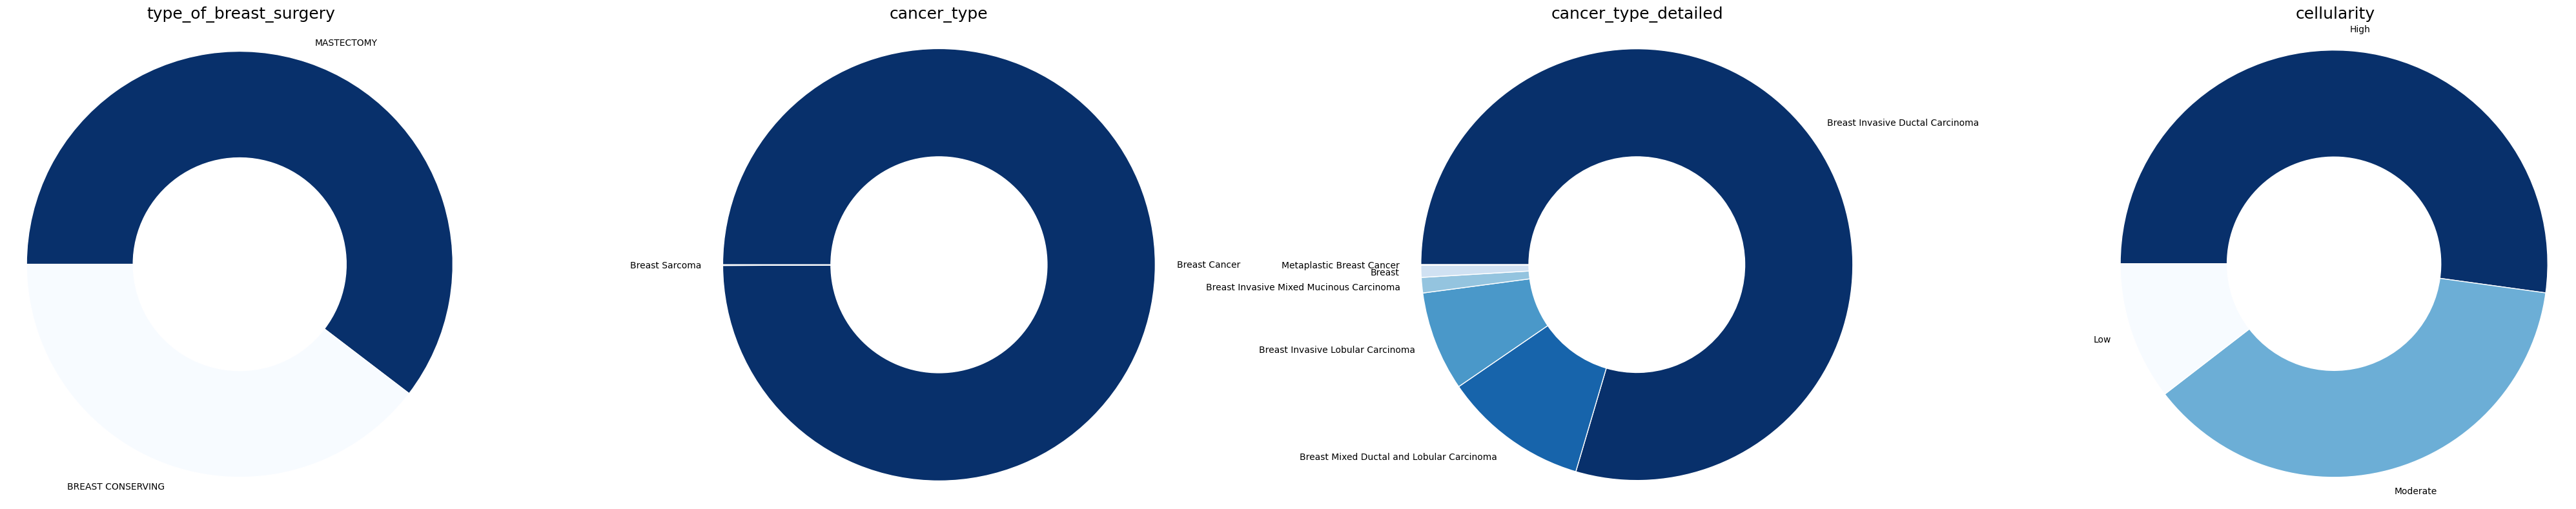

In [17]:
plot_multiple_pie_subplots(rows=1, cols=4, columns=object_columns_df.columns[:4], colormap="Blues_r")

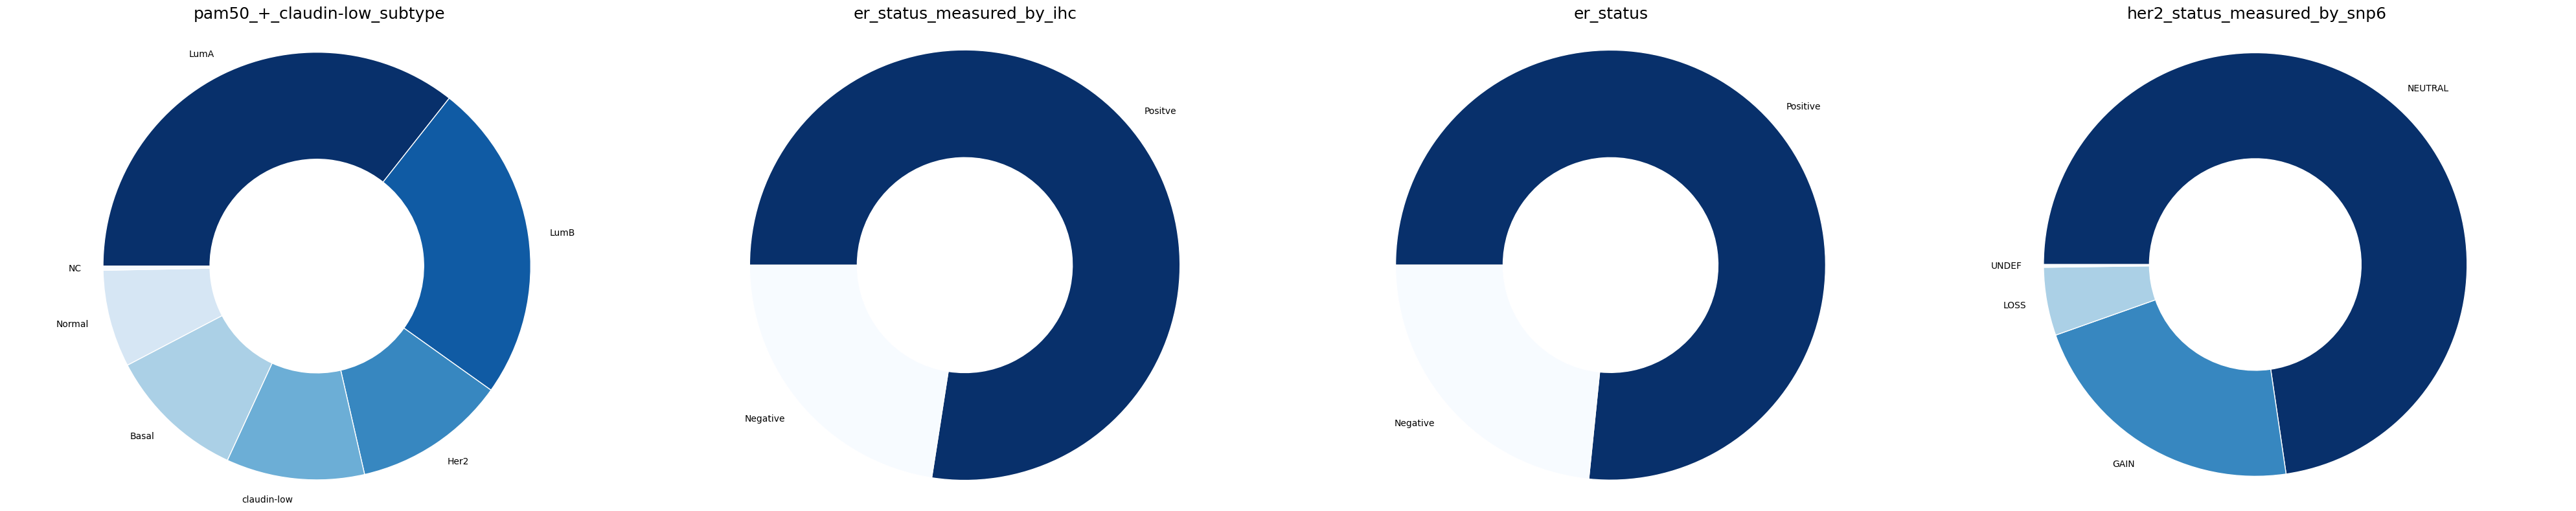

In [18]:
plot_multiple_pie_subplots(rows=1, cols=4, columns=object_columns_df.columns[4:8], colormap="Blues_r")

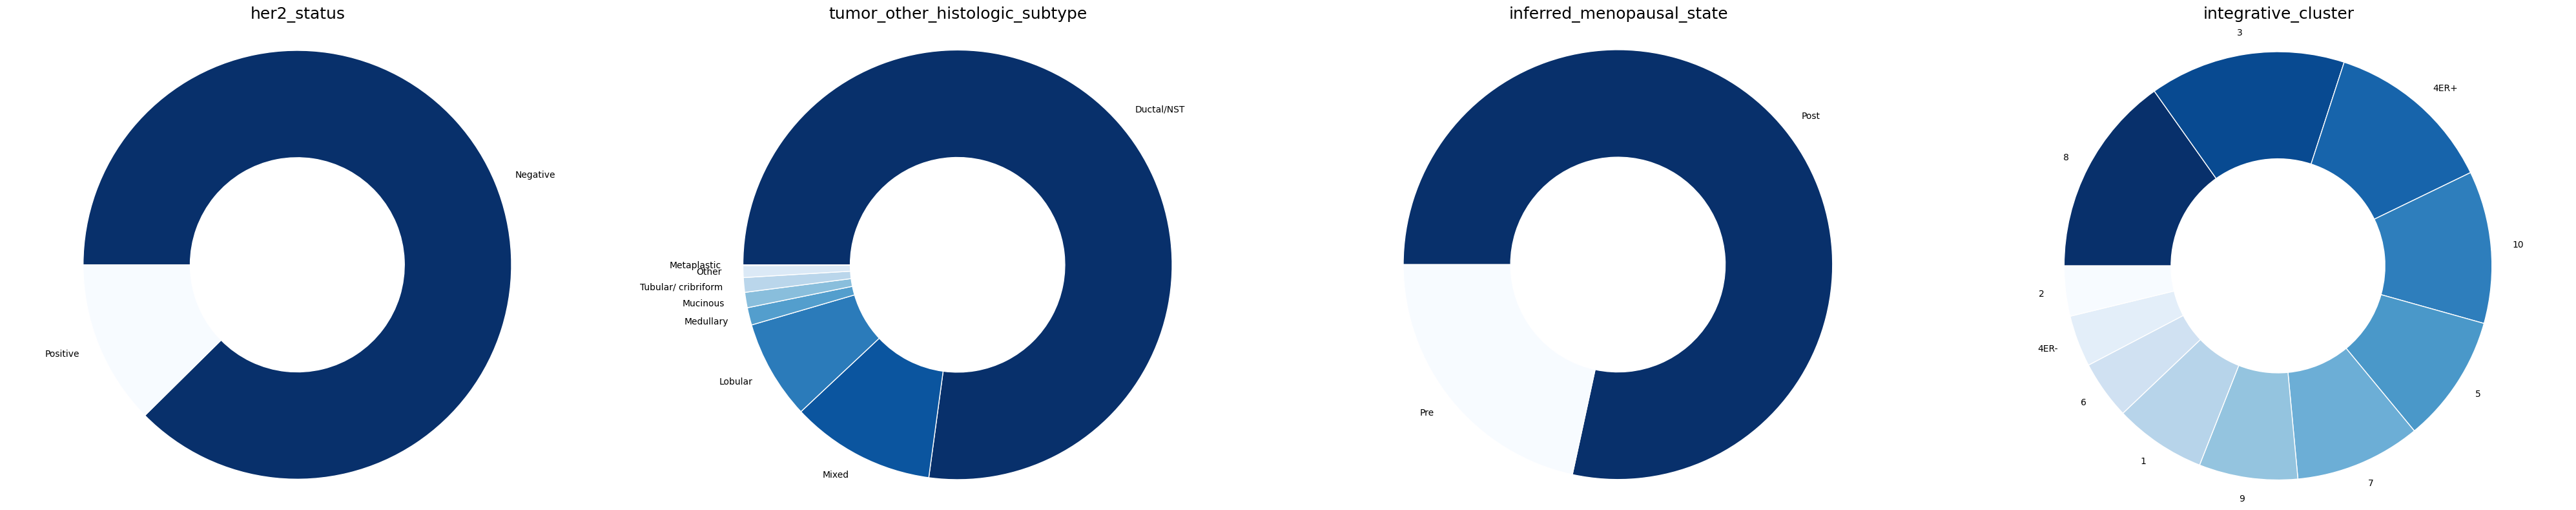

In [19]:
plot_multiple_pie_subplots(rows=1, cols=4, columns=object_columns_df.columns[8:12], colormap="Blues_r")

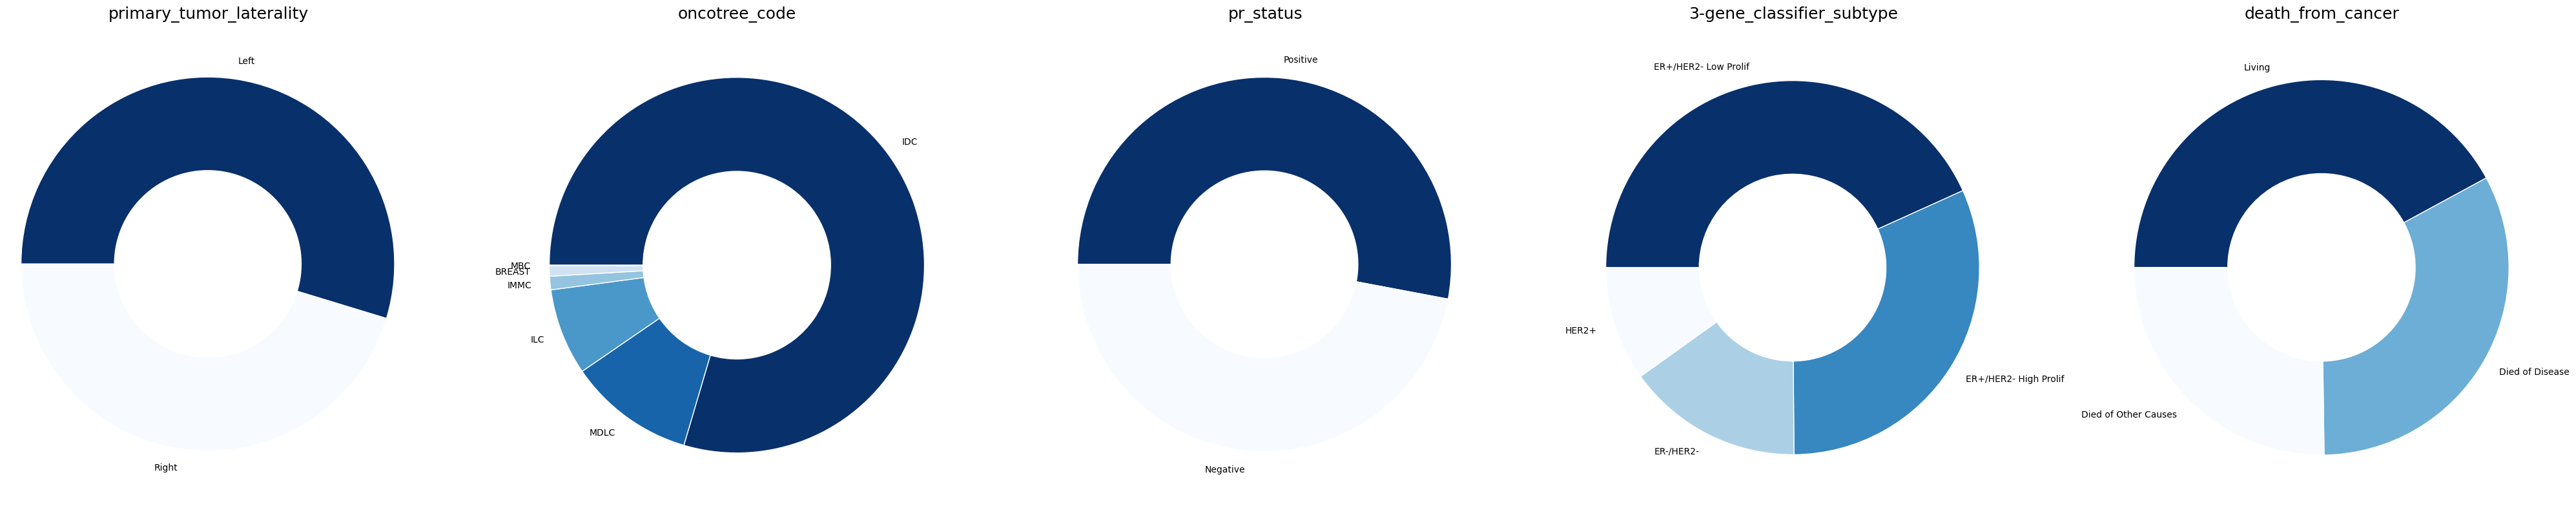

In [20]:
plot_multiple_pie_subplots(rows=1, cols=5, columns=object_columns_df.columns[12:], colormap="Blues_r")

From this analysis, I could infer the following:
- I can see that the feature `cancer_type` could be removed, as it contains **1903 Breast Cancer** value and only **1 Breast Sarcoma**.
- The `cellularity` feature is an ordinal categorical feature which can be converted using **LabelEncoder** to be {'low': 0, 'moderate': 1, 'high': 2}.

- The `type_of_breast_surgery`, `cancer_type_detailed`, `pam50_+_claudin-low_subtype`, `her2_status_measured_by_snp6`, `tumor_other_histologic_subtype`, `integrative_cluster`, `oncotree_code`, `3-gene_classifier_subtype`, and `death_from_cancer` are all nominal categorical feature, hence we will use **OneHotEncoding** for encoding these features.

- The `er_status_measured_by_ihc`, `er_status`, `her2_status`, `inferred_menopausal_state`, `primary_tumor_laterality`, and `pr_status` are all binary features, hence **BinaryEndoding** will be ideal for encoding those features.

- `er_status_measured_by_ihc` and `er_status` features have a quite similar pie chart and that's may be a sign of a correlation between these 2 features.

- `pr_status` and `primary_tumor_laterality` also have a quite simialt pie chart and that's may be a sign of a correlation.

### 2.2.2 Exploring Numerical Clinical Attributes (`int`, `float`)

In [21]:
numerical_columns_df = clinical_data.select_dtypes(include=["int", "float"])
numerical_columns_df.head()

,patient_id,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,radio_therapy,tumor_size,tumor_stage
0,0,75.65,0,1.0,3.0,1,10.0,5.0,6.044,140.500000,1,1,22.0,2.0
1,2,43.19,0,1.0,3.0,1,0.0,2.0,4.020,84.633333,1,1,10.0,1.0
2,5,48.87,1,1.0,2.0,1,1.0,2.0,4.030,163.700000,0,0,15.0,2.0
3,6,47.68,1,1.0,2.0,1,3.0,1.0,4.050,164.933333,1,1,25.0,2.0
4,8,76.97,1,1.0,3.0,1,8.0,2.0,6.080,41.366667,0,1,40.0,2.0


In [22]:
numerical_columns_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1903 entries, 0 to 1903
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   patient_id                     1903 non-null   int64  
 1   age_at_diagnosis               1903 non-null   float64
 2   chemotherapy                   1903 non-null   int64  
 3   cohort                         1903 non-null   float64
 4   neoplasm_histologic_grade      1903 non-null   float64
 5   hormone_therapy                1903 non-null   int64  
 6   lymph_nodes_examined_positive  1903 non-null   float64
 7   mutation_count                 1903 non-null   float64
 8   nottingham_prognostic_index    1903 non-null   float64
 9   overall_survival_months        1903 non-null   float64
 10  overall_survival               1903 non-null   int64  
 11  radio_therapy                  1903 non-null   int64  
 12  tumor_size                     1903 non-null   f

In [23]:
numerical_columns_df.describe()

,patient_id,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,radio_therapy,tumor_size,tumor_stage
count,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000
mean,3921.347346,61.088355,0.208092,2.643720,2.437730,0.616921,2.003153,5.677352,4.033020,125.053074,0.420914,0.596952,26.210594,1.750929
std,2358.935544,12.981999,0.406050,1.228911,0.647884,0.486265,4.080807,4.009446,1.144792,76.296083,0.493836,0.490639,15.086489,0.539757
min,0.000000,21.930000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,896.000000,51.370000,0.000000,1.000000,2.000000,0.000000,0.000000,3.000000,3.046000,60.783333,0.000000,0.000000,17.000000,1.000000
50%,4730.000000,61.780000,0.000000,3.000000,3.000000,1.000000,0.000000,5.000000,4.042000,115.600000,0.000000,1.000000,23.000000,1.750535
75%,5537.500000,70.595000,0.000000,3.000000,3.000000,1.000000,2.000000,7.000000,5.040500,184.550000,1.000000,1.000000,30.000000,2.000000
max,7299.000000,96.290000,1.000000,5.000000,3.000000,1.000000,45.000000,80.000000,6.360000,355.200000,1.000000,1.000000,182.000000,4.000000


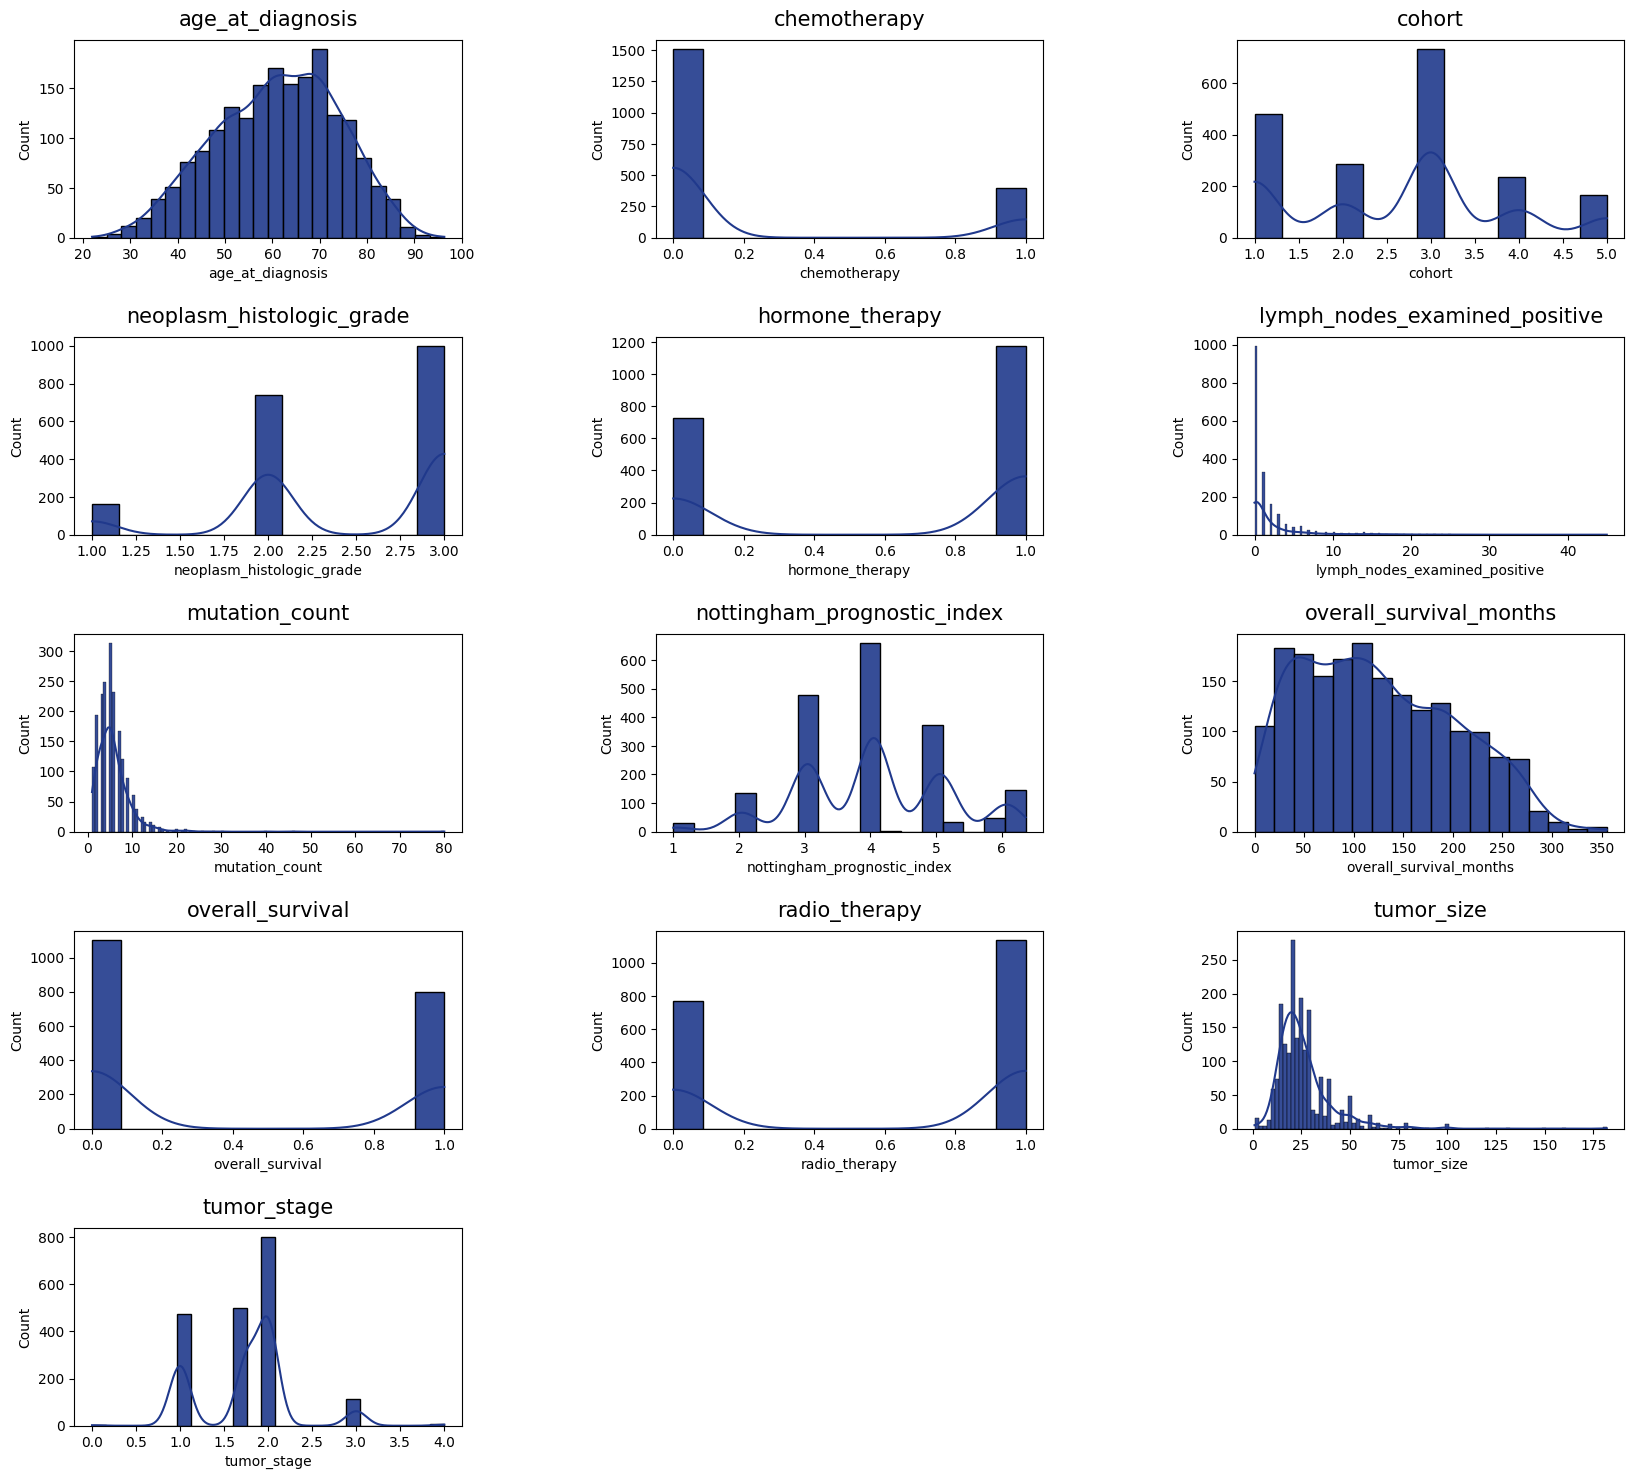

In [24]:
fig, axes = plt.subplots(5, 3, figsize=(20, 18), gridspec_kw={"hspace": 0.5, "wspace": 0.5})
axes = axes.flatten()

# Note: the reason for subtracting one is to not consider the patient id
num_features = numerical_columns_df.shape[1] - 1

for i, col in enumerate(numerical_columns_df.columns[1:]):
    sns.histplot(numerical_columns_df[col], ax=axes[i], kde=True, alpha=0.9, color="#20398C")
    sns.histplot()
    axes[i].set_title(col, fontsize=15, pad=10)

for i in range(num_features, len(axes)):
    fig.delaxes(axes[i])

In [25]:
discrete_numerical_features = numerical_columns_df[["chemotherapy", "cohort", "neoplasm_histologic_grade", "hormone_therapy", "overall_survival", "radio_therapy", "tumor_stage"]]
discrete_numerical_features.head()

,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,overall_survival,radio_therapy,tumor_stage
0,0,1.0,3.0,1,1,1,2.0
1,0,1.0,3.0,1,1,1,1.0
2,1,1.0,2.0,1,0,0,2.0
3,1,1.0,2.0,1,1,1,2.0
4,1,1.0,3.0,1,0,1,2.0


In [26]:
discrete_numerical_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1903 entries, 0 to 1903
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   chemotherapy               1903 non-null   int64  
 1   cohort                     1903 non-null   float64
 2   neoplasm_histologic_grade  1903 non-null   float64
 3   hormone_therapy            1903 non-null   int64  
 4   overall_survival           1903 non-null   int64  
 5   radio_therapy              1903 non-null   int64  
 6   tumor_stage                1903 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 118.9 KB


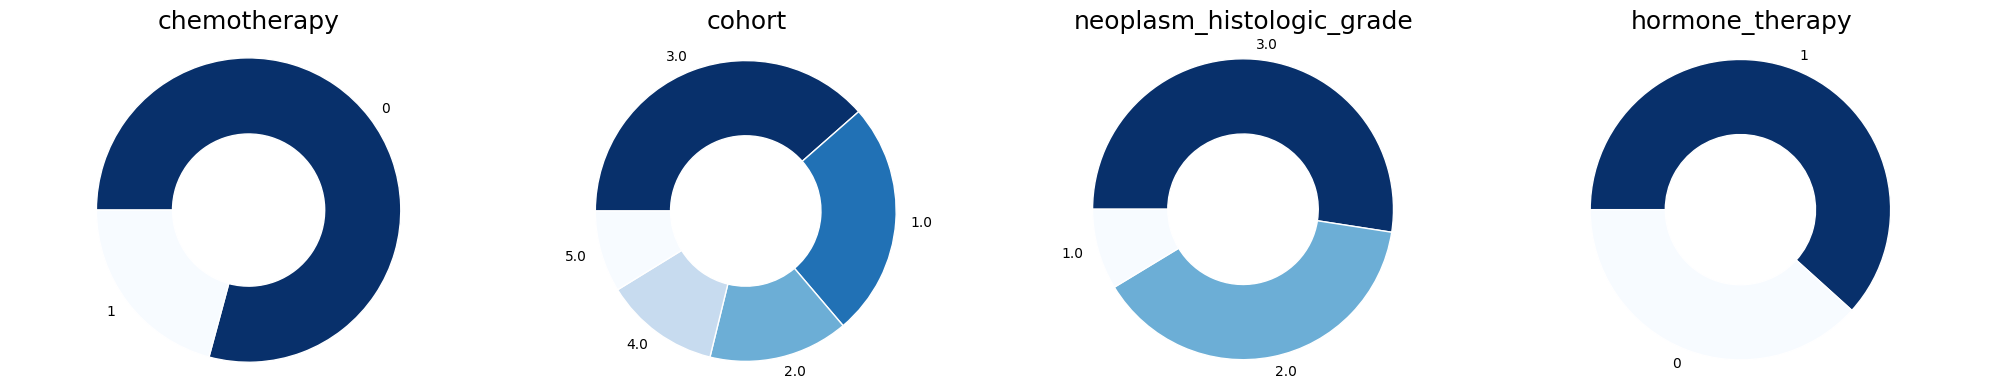

In [27]:
fig, axes = plt.subplots(1, 4, figsize=(20, 4))
axes = axes.flatten()

for i, col in enumerate(discrete_numerical_features.columns[:4]):
    plot_pie_chart(axes[i], discrete_numerical_features[col], col, "Blues_r")

plt.tight_layout()

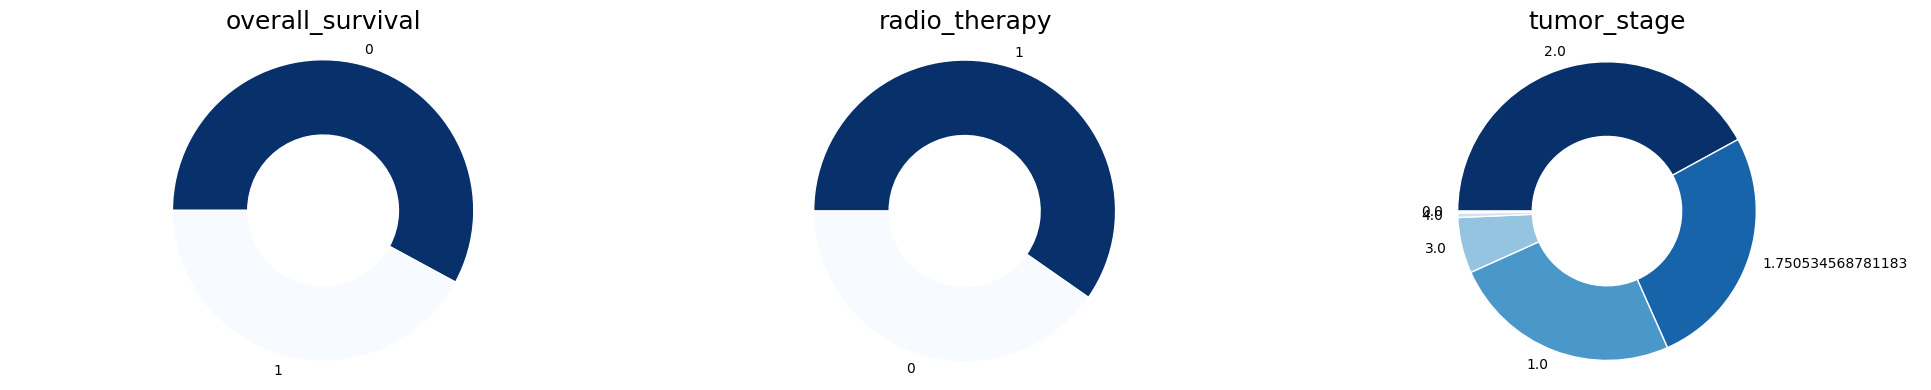

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(20, 4))
axes = axes.flatten()

for i, col in enumerate(discrete_numerical_features.columns[4:]):
    plot_pie_chart(axes[i], discrete_numerical_features[col], col, "Blues_r")

plt.tight_layout()

### 2.2.3 Getting out Some Insights

In [29]:
cmap = cm.get_cmap("Blues_r")
colors = cmap(np.linspace(0, 1, 10))

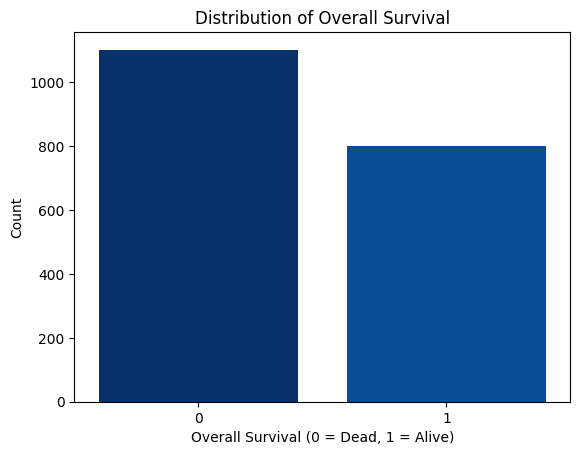

In [30]:
sns.countplot(x="overall_survival", data=clinical_data, palette=colors, saturation=1)
plt.title("Distribution of Overall Survival")
plt.xlabel("Overall Survival (0 = Dead, 1 = Alive)")
plt.ylabel("Count")
plt.show()

#### 2.2.3.1 The Relationship between Age and the Survival

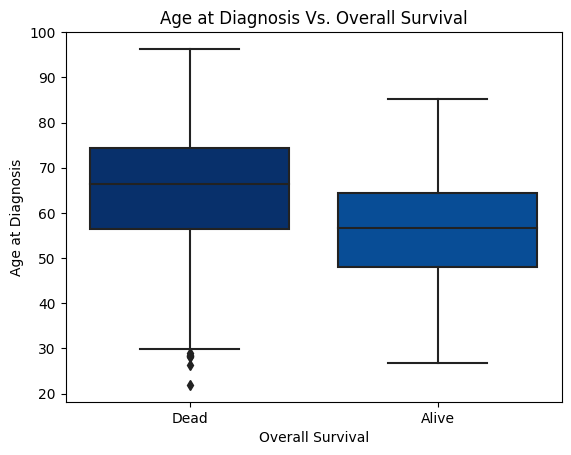

In [31]:
sns.boxplot(
    x="overall_survival",
    y="age_at_diagnosis",
    data=numerical_columns_df,
    palette=colors,
    saturation=1
)

plt.title("Age at Diagnosis Vs. Overall Survival")
plt.xlabel("Overall Survival")
plt.ylabel("Age at Diagnosis")
plt.xticks([0, 1], ["Dead", "Alive"]);

#### 2.2.3.2 The Relationship between Hormone Therapy and Overall Survival

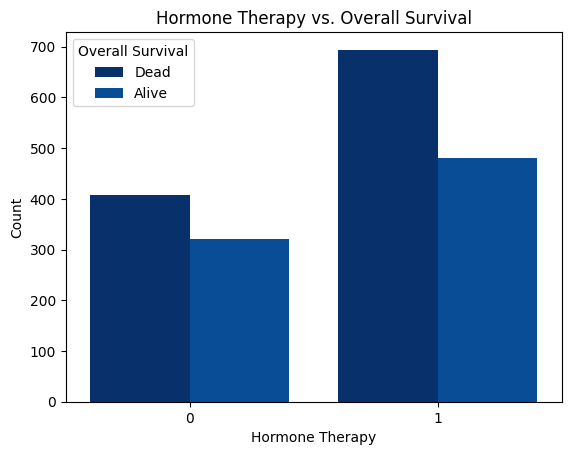

In [32]:
sns.countplot(
    x="hormone_therapy",
    hue="overall_survival", 
    data=numerical_columns_df, 
    palette=colors, 
    saturation=1.0
)
plt.title("Hormone Therapy vs. Overall Survival")
plt.xlabel("Hormone Therapy")
plt.ylabel("Count")
plt.legend(title="Overall Survival", labels=["Dead", "Alive"]);

#### 2.2.3.3 The Relationship between Chemotherapy and Overall Survival

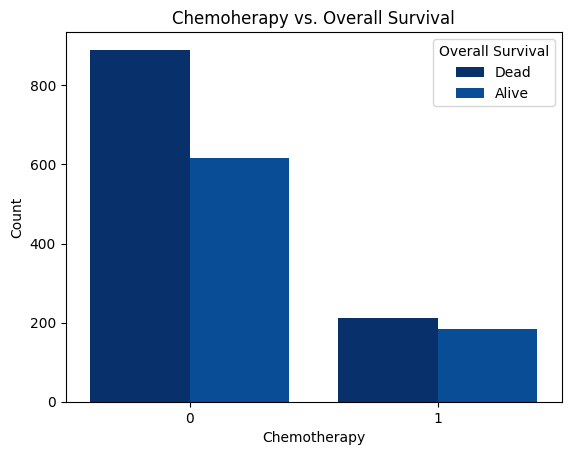

In [33]:
sns.countplot(
    x="chemotherapy",
    hue="overall_survival",
    data=numerical_columns_df,
    palette=colors,
    saturation=1.0,
)
plt.title("Chemoherapy vs. Overall Survival")
plt.xlabel("Chemotherapy")
plt.ylabel("Count")
plt.legend(title="Overall Survival", labels=["Dead", "Alive"]);

#### 2.2.3.4 The Relationship between Radio Therapy and Overall Survival

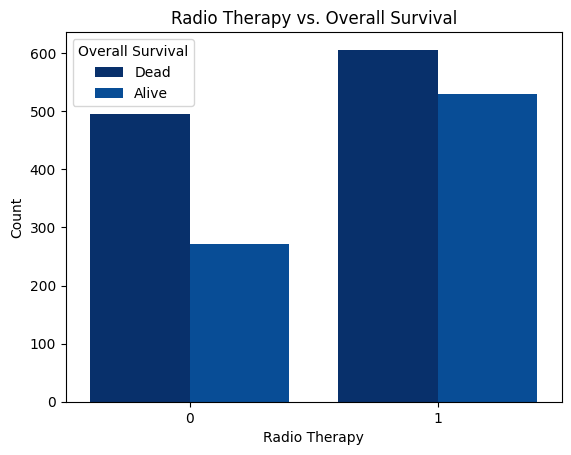

In [34]:
sns.countplot(
    x="radio_therapy",
    hue="overall_survival",
    data=numerical_columns_df,
    palette=colors,
    saturation=1.0,
)
plt.title("Radio Therapy vs. Overall Survival")
plt.xlabel("Radio Therapy")
plt.ylabel("Count")
plt.legend(title="Overall Survival", labels=["Dead", "Alive"]);

#### 2.2.3.5 The Relationship between All Therapies and Overall Survival

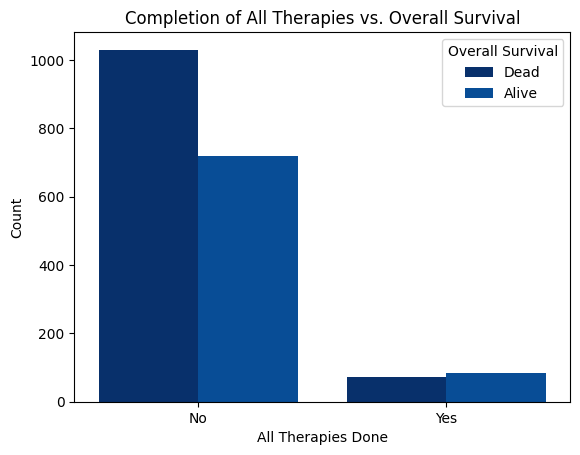

In [35]:
numerical_columns_df["all_therapies_done"] = (
    numerical_columns_df["hormone_therapy"]
    & numerical_columns_df["chemotherapy"]
    & numerical_columns_df["radio_therapy"]
).astype(int)

# Bar plot of 'all_therapies_done' vs. 'overall_survival'
sns.countplot(
    x="all_therapies_done",
    hue="overall_survival",
    data=numerical_columns_df,
    palette=colors,
    saturation=1
)

plt.title("Completion of All Therapies vs. Overall Survival")
plt.xlabel("All Therapies Done")
plt.ylabel("Count")
plt.xticks([0, 1], ["No", "Yes"])
plt.legend(title="Overall Survival", labels=["Dead", "Alive"]);

#### 2.2.3.6 The Relationship between PAM50 + Claudin-low Subtype and the Survival

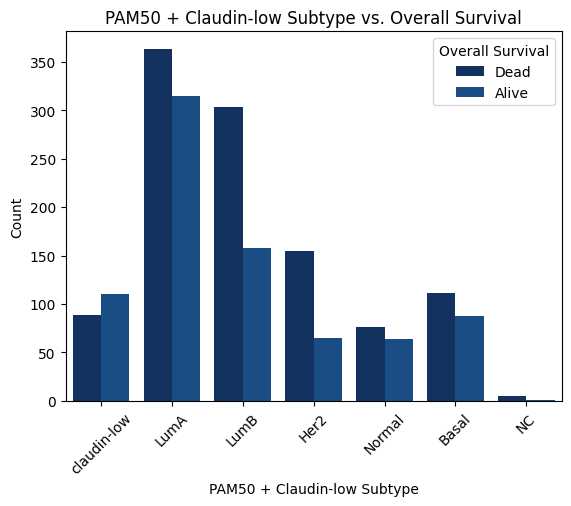

In [36]:
sns.countplot(
    x="pam50_+_claudin-low_subtype",
    hue="overall_survival",
    data=clinical_data,
    palette=colors,
)
plt.title("PAM50 + Claudin-low Subtype vs. Overall Survival")
plt.xlabel("PAM50 + Claudin-low Subtype")
plt.ylabel("Count")
plt.legend(title="Overall Survival", labels=["Dead", "Alive"])
plt.xticks(rotation=45);

#### 2.2.3.7 The Relationship between Integerative Cluster and the Survival

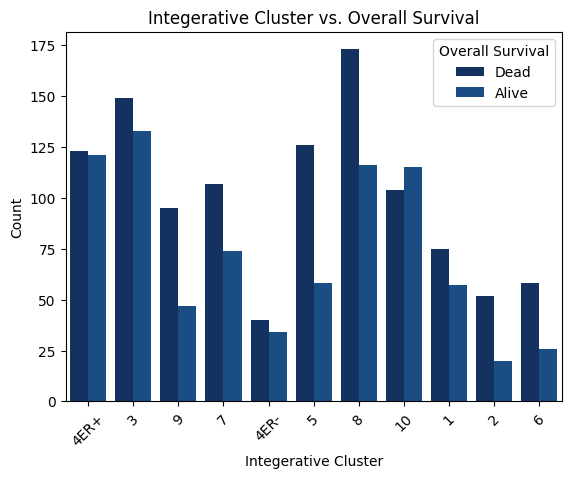

In [37]:
sns.countplot(
    x="integrative_cluster",
    hue="overall_survival",
    data=clinical_data,
    palette=colors,
)
plt.title("Integerative Cluster vs. Overall Survival")
plt.xlabel("Integerative Cluster")
plt.ylabel("Count")
plt.legend(title="Overall Survival", labels=["Dead", "Alive"])
plt.xticks(rotation=45);

#### 2.2.3.8 The Relationship between 3-Gene Classifier Subtype and the Survival

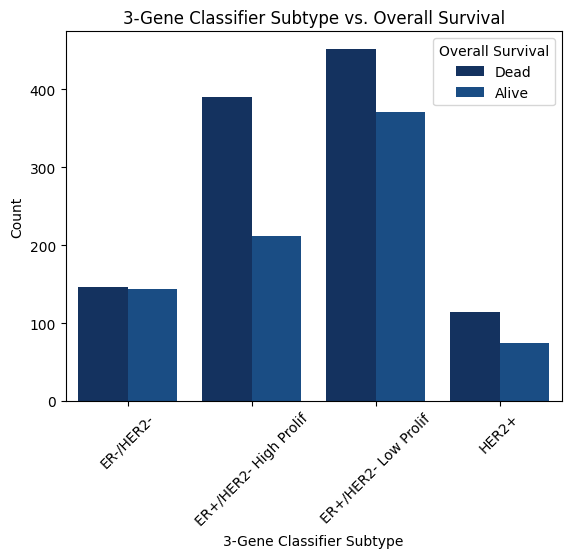

In [38]:
sns.countplot(
    x="3-gene_classifier_subtype",
    hue="overall_survival",
    data=clinical_data,
    palette=colors,
)
plt.title("3-Gene Classifier Subtype vs. Overall Survival")
plt.xlabel("3-Gene Classifier Subtype")
plt.ylabel("Count")
plt.legend(title="Overall Survival", labels=["Dead", "Alive"])
plt.xticks(rotation=45);

#### 2.2.3.9 The Relationship between ER Status and the Survival

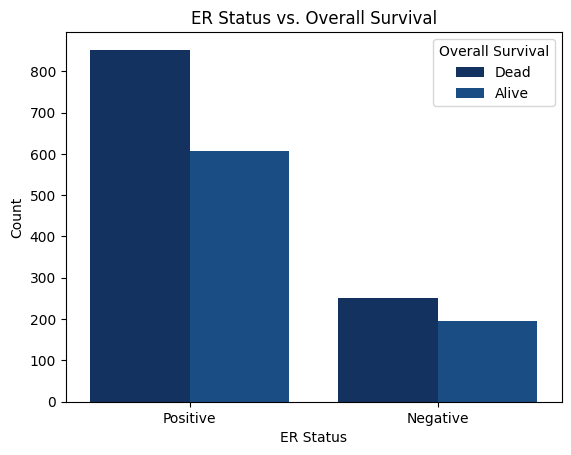

In [39]:
sns.countplot(x="er_status", hue="overall_survival", data=clinical_data, palette=colors)
plt.title("ER Status vs. Overall Survival")
plt.xlabel("ER Status")
plt.ylabel("Count")
plt.legend(title="Overall Survival", labels=["Dead", "Alive"]);

#### 2.2.3.10 The Relationship between HER2 Status and the Survival

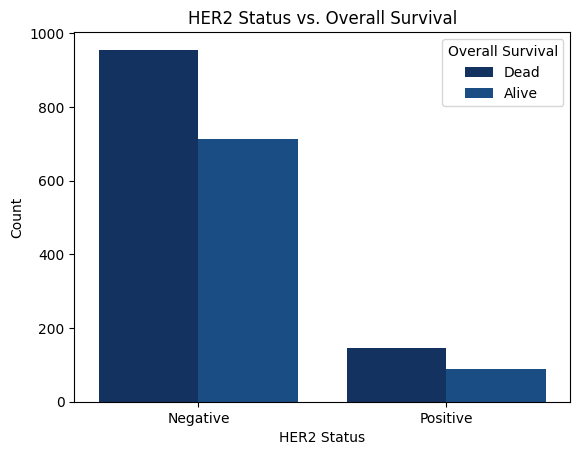

In [40]:
sns.countplot(
    x="her2_status", hue="overall_survival", data=clinical_data, palette=colors
)
plt.title("HER2 Status vs. Overall Survival")
plt.xlabel("HER2 Status")
plt.ylabel("Count")
plt.legend(title="Overall Survival", labels=["Dead", "Alive"]);